In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [3]:
#Load Data
company = 'TSLA'
start = dt.datetime(2018,1,1)
end = dt.datetime(2021,1,1)

In [4]:
data = web.DataReader(company, 'yahoo', start, end)

In [5]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998
...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.989990,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.510010,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.000000,665.989990,22910800.0,665.989990


In [6]:
data.head(n=20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998
2018-01-09,67.760002,65.480003,67.031998,66.737999,35733000.0,66.737999
2018-01-10,67.400002,66.000000,66.440002,66.959999,21549500.0,66.959999
2018-01-11,68.961998,66.652000,67.047997,67.589996,33227500.0,67.589996
2018-01-12,68.082001,66.734001,67.725998,67.244003,24125500.0,67.244003


In [7]:
#Prepare Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [8]:
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
#Build The Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  #Prediction Of Next Closing

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
22/22 [==============================] - 13s 82ms/step - loss: 0.0460
Epoch 2/50
22/22 [==============================] - 2s 85ms/step - loss: 0.0039
Epoch 3/50
22/22 [==============================] - 2s 83ms/step - loss: 0.0036
Epoch 4/50
22/22 [==============================] - 2s 100ms/step - loss: 0.0033
Epoch 5/50
22/22 [==============================] - 2s 87ms/step - loss: 0.0032
Epoch 6/50
22/22 [==============================] - 2s 75ms/step - loss: 0.0022
Epoch 7/50
22/22 [==============================] - 2s 78ms/step - loss: 0.0025
Epoch 8/50
22/22 [==============================] - 2s 86ms/step - loss: 0.0025
Epoch 9/50
22/22 [==============================] - 2s 96ms/step - loss: 0.0030
Epoch 10/50
22/22 [==============================] - 2s 82ms/step - loss: 0.0018
Epoch 11/50
22/22 [==============================] - 2s 78ms/step - loss: 0.0023
Epoch 12/50
22/22 [==============================] - 2s 90ms/step - loss: 0.0019
Epoch 13/50
22/22 [================

In [10]:
#Test the Model Accuracy on Existing Data
#Load Test Data
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_price = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data)- prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_input = scaler.transform(model_inputs)


In [11]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

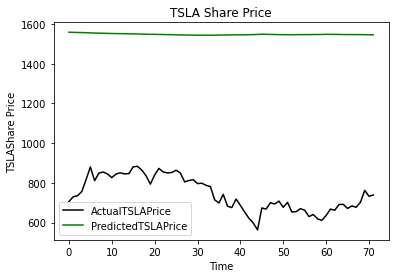

In [12]:
#Plot the Test Predictions
plt.plot(actual_price, color = 'black', label=f'Actual{company}Price')
plt.plot(predicted_prices, color='green', label=f'Predicted{company}Price')
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company}Share Price')
plt.legend()
plt.show()

In [13]:
#Predict Next Day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

#print(scaler.inverse_transform(real_data[-1]))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[1545.1125]]
